# Stress detection

The steps demonstrated in this notebook are:

1. Loading the data
2. Familiarizing with data & EDA
3. Visualizing the data
4. Splitting the data
5. Training the data
6. Conclusion

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [135]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/stress.csv')
data.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [136]:
## Saving the dataframe in local

data.to_csv('stress.csv')

In [137]:
data = pd.read_csv('stress.csv', usecols=range(1,117))
data.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [138]:
## Checking Null values in the data
## No null values present

data.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [139]:
## To prove null values in the data through loop if no feature is visible then data has no null values

for feature in data.columns:
    if data[feature].isnull().sum():
        print(feature)

In [140]:
## Transforming the sentence to required stopwords used for training

import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
#data["text"] = data["text"].apply(clean)

[nltk_data] Downloading package stopwords to C:\Users\Babu
[nltk_data]     Jayaraman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [141]:
##  Taking the first row in the dataframe and viewing the transformation which is requried to be used for training with the
## stop words

data['text'][0]

'He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI\'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f\'n worried about my heart. I do happen to have a physical in 48 hours.'

In [142]:
clean(data['text'][0])

'said felt way sugget go rest trigger ahead youir hypocondriac like decid look feel doom hope mayb get suck rabbit hole ludicr conspiraci stupid psychic test new age bs someth could even laugh road end read sens doom indic various health ailment one prone top doom gloomi fn worri heart happen physic  hour'

In [143]:
## Applying whole dataframe data column data['text'] into it for transformation

data["text"] = data["text"].apply(clean)

In [144]:
data['text'][2000]

'alreadi know password laptop email bank account phone pin didnt realli want tell could think reason got new phone set new pin got bit upset chang said noth hide know password dont anyth hide told'

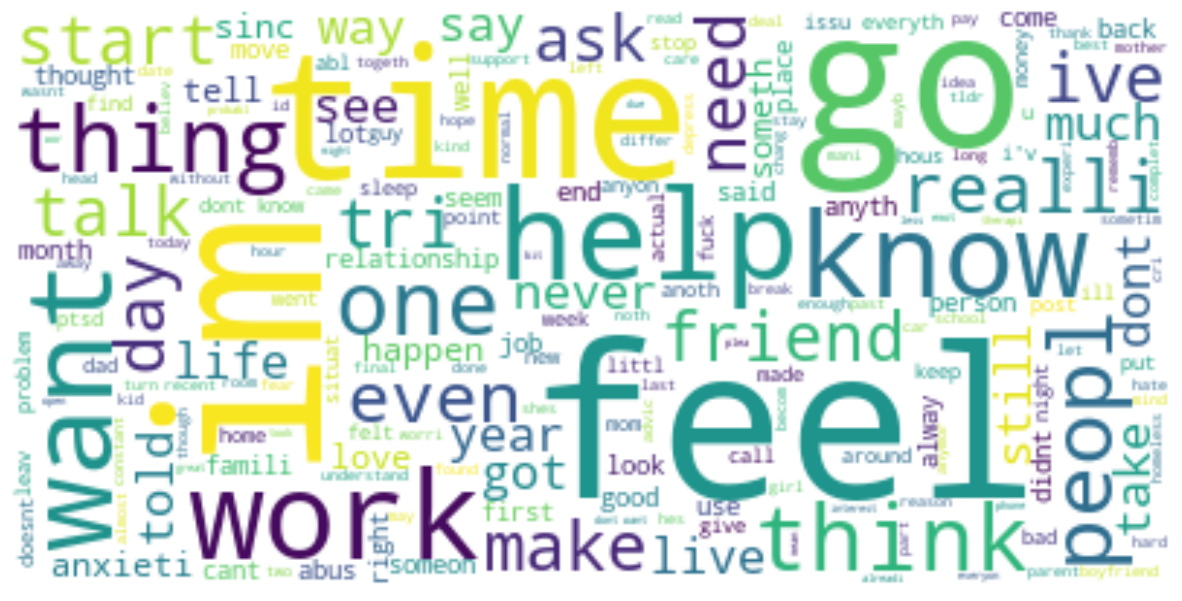

In [145]:
## Stopwords visualization

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Stress detection Model

In [146]:
## Data encoding

data["label"] = data["label"].map({0: "No_Stress", 1: "Stress"})
data = data[["text", "label"]]
print(data.head())

                                                text      label
0  said felt way sugget go rest trigger ahead you...     Stress
1  hey rassist sure right place post goe  im curr...  No_Stress
2  mom hit newspap shock would know dont like pla...     Stress
3  met new boyfriend amaz kind sweet good student...     Stress
4  octob domest violenc awar month domest violenc...     Stress


In [147]:
data.head()

,text,label
0,said felt way sugget go rest trigger ahead you...,Stress
1,hey rassist sure right place post goe im curr...,No_Stress
2,mom hit newspap shock would know dont like pla...,Stress
3,met new boyfriend amaz kind sweet good student...,Stress
4,octob domest violenc awar month domest violenc...,Stress


In [148]:
## Splitting train and test data

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(data["text"])
y = np.array(data["label"])


cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size=0.33, 
                                                random_state=42)

In [150]:
## Modelling using Bernoulli Naive Bayes

from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(xtrain, ytrain)

BernoulliNB()

In [151]:
## Validating it with the test data and accuracy of the model

print("Accuracy of the Model is",model.score(xtest,ytest)*100,"%")

Accuracy of the Model is 74.70651013874067 %


### Testing a Model with the user output

In [152]:
## Stress input feeded -- Sometime I feel like I need some help

user = input("Enter a Text: ")
test_data = cv.transform([user]).toarray()
output = model.predict(test_data)
print(output)

Enter a Text: Sometime I feel like I need some help
['Stress']


In [153]:
## Stress input feeded --  I feel like that I was panic

user = input("Enter a Text: ")
test_data = cv.transform([user]).toarray()
output = model.predict(test_data)
print(output)

Enter a Text: I feel like that I was panic
['Stress']


In [154]:
## No stress input feeeded -- I was happy

user = input("Enter a Text: ")
test_data = cv.transform([user]).toarray()
output = model.predict(test_data)
print(output)

Enter a Text: I was happy
['No_Stress']


### Storing the Best Model

In [155]:
import pickle

## Dumping the count vectorizer transformation into pickle file
pickle.dump(cv, open('Pre_processing.pkl','wb'))

## Dumping the model into the pickle file
pickle.dump(model, open('finalized_model.pkl', 'wb'))

In [156]:
## Loading the pickle file and testing with the test data

Text_to_detect_stress = pickle.load(open('Pre_processing.pkl','rb'))
model = pickle.load(open('finalized_model.pkl','rb'))

test = Text_to_detect_stress.transform(["I feel like that I was panic"])
prediction = str(model.predict(test))
prediction

"['Stress']"